# **Multi-Layer Perceptron (MLP)**

### **What is a Multi-Layer Perceptron?**

An MLP is a feedforward artificial neural network
Evolution from single perceptron to handle non-linear problems
Consists of multiple layers of nodes (neurons) with weighted connections.

### **Key Differences from Single Perceptron**

**Multiple Layers**

- Input layer: Receives raw data
- Hidden layer(s): Processes information
- Output layer: Produces final prediction


**Non-linear Capabilities**

- Can solve XOR and other non-linearly separable problems
- Uses non-linear activation functions
- Can approximate any continuous function (Universal Approximation Theorem)

### **Real-world Applications**
**Pattern Recognition**
- Handwriting recognition
- Face detection
- Speech recognition


**Prediction Tasks**
- Stock market prediction
- Weather forecasting
- Customer behavior prediction


**Classification Problems**
- Email spam detection
- Medical diagnosis
- Credit risk assessment

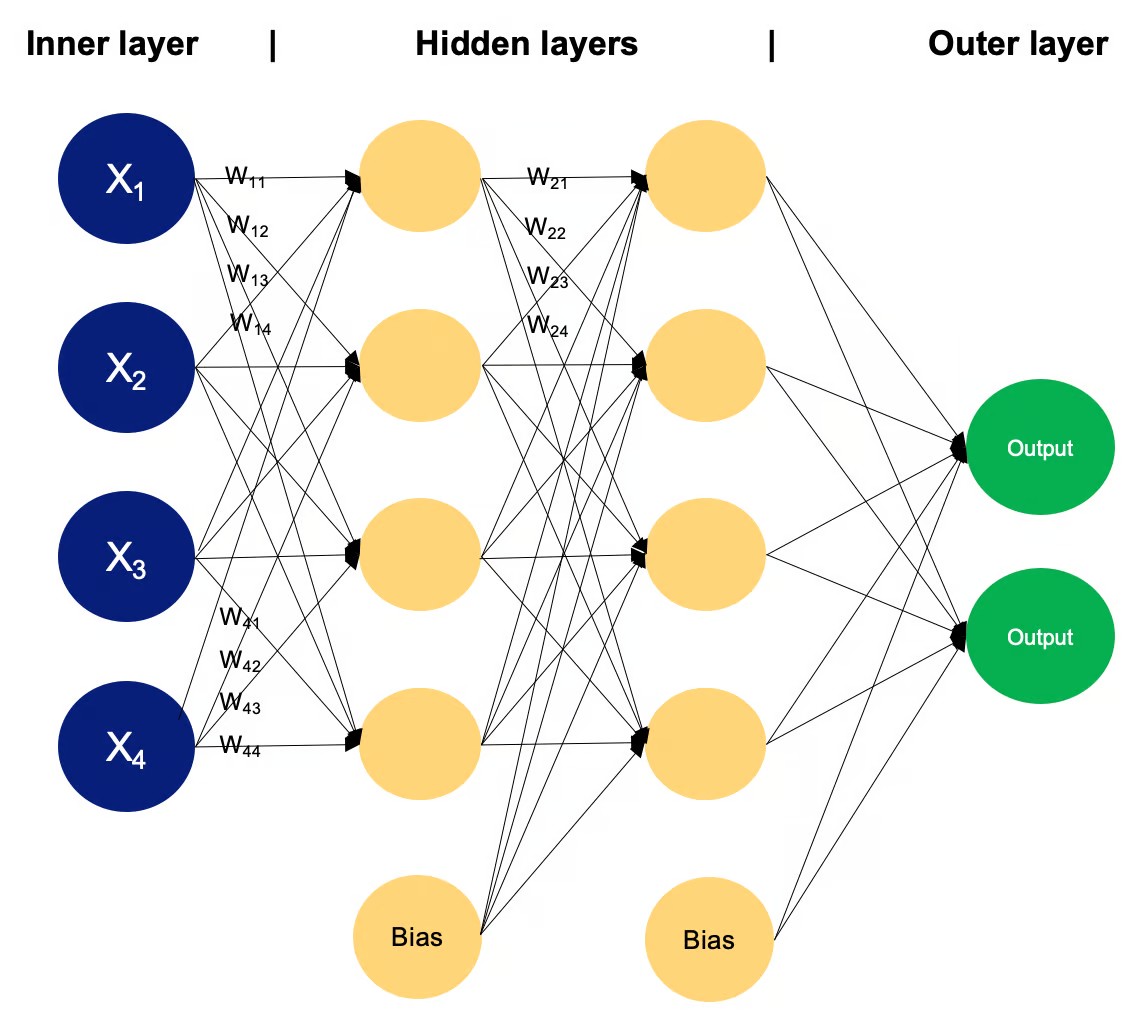

## **Basic Architecture**

### **Input Layer**
- One neuron per input feature
- No computation performed
- Passes data to hidden layers

### **Hidden Layers**
- Process information from previous layer
- Apply weights, biases, and activation functions
- Extract hierarchical features

### **Output Layer**
- Produces final prediction(s)
- Shape depends on problem type
- Uses appropriate activation function

## **Core Concepts**
### **1. Forward Propagation**

For each layer:
  1. Multiply inputs by weights: z = w * x
  2. Add bias: z = z + b
  3. Apply activation function: a = f(z)
  4. Pass to next layer
```
z[l] = W[l]*x[l-1] + b[l]
a[l] = f(z[l])
```






### **2. Activation Functions**
#### **ReLU (Rectified Linear Unit)**
- **Formula:** f(x) = max(0, x)
- **Benefits:**
  - Reduces vanishing gradient problem
  - Computationally efficient
  - Produces sparse activations
- **Use case:** Hidden layers

#### **Sigmoid**
- **Formula:** f(x) = 1 / (1 + e^(-x))
- **Benefits:**
  - Outputs between 0 and 1
  - Good for binary classification
- **Use case:** Output layer for binary classification

#### **Tanh**
- **Formula:** f(x) = (e^x - e^(-x)) / (e^x + e^(-x))
- **Benefits:**
  - Outputs between -1 and 1
  - Zero-centered
- **Use case:** Hidden layers alternative to ReLU

### **3. Loss Functions**
#### **Binary Cross-Entropy**
- For binary classification
- Formula: -Σ(y log(ŷ) + (1-y)log(1-ŷ))
- Measures prediction error

#### **Mean Squared Error**
- For regression problems
- Formula: (1/n)*Σ(y - ŷ)²
- Measures average squared difference

### **4. Backpropagation Basics**
#### **Chain Rule Application**
- Calculate error at output
- Propagate error backwards
- Calculate gradients for each layer
- Update weights and biases


#### **Gradient Calculation**
For each layer from last to first:
  1. Calculate error gradient
  2. Multiply by activation function derivative
  3. Multiply by input to that layer
  4. Calculate weight gradients



```
# Weight and bias update
W = W - α * dW
b = b - α * db
```

### **5. Gradient Descent**
#### **Batch Gradient Descent**
- Uses all training data
- More stable, slower

#### **Stochastic Gradient Descent (SGD)**
- Uses one sample at a time
- Faster, more noisy

#### **Mini-batch Gradient Descent**
- Uses batches of samples
- Best of both worlds

### **Learning Rate**
- Controls step size in weight updates
- Too high: Overshooting
- Too low: Slow convergence
- Typical values: 0.1, 0.01, 0.001

# IMPLEMENTATION

### Initialize Weights and Biases

layers: A LIST CONTAINING OUR MODEL ARCHITECTURE [3,4,1]

[0,2,3,3]
[0,2,3,3]
[0,2,3,4]

In [ ]:
import numpy as np

In [ ]:
def initialize_weights(layers):
    """Initialize weights and biases for all layers."""
    weights = []
    biases = []
    for i in range(len(layers) - 1):
        weights.append(np.random.randn(layers[i], layers[i + 1]) * np.sqrt(2 / layers[i]))  # He initialization
        biases.append(np.zeros((1, layers[i + 1])))
    return weights, biases

### Activation Functions

In [ ]:
# ACtivation Functions

def relu(z):
  return np.maximum(0,z)

def sigmoid(z):
  return 1 / (1 + np.exp(-z))

def tanh(z):
  return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))

def softmax(z):
  return np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)

def relu_derivative(z):
    return (z > 0).astype(float)

def sigmoid_derivative(z):
    sx = sigmoid(z)
    return sx * (1 - sx)

def tanh_derivative(z):
    tx = tanh(z)
    return 1 - tx**2



### Forward Propagation (Forward Pass)

In [ ]:
def forward(X, weights, biases):
    """Perform forward propagation."""
    activations = [X]
    for i in range(len(weights) - 1):
      z = np.dot(X, weights[i]) + biases[i]
      X = relu(z)
      activations.append(X)
    output = sigmoid(np.dot(X, weights[-1]) + biases[-1])
    activations.append(output)
    return activations

### Backward Propagation

In [ ]:
def backward(X, y, activations, weights):
    """Perform backward propagation."""
    m = X.shape[0] # Number of samples
    deltas = [activations[-1] - y]
    for i in range(len(weights) - 1, 0, -1):
        deltas.insert(0, np.dot(deltas[0], weights[i].T) * relu_derivative(activations[i]))
    weight_grads = [np.dot(activations[i].T, deltas[i]) / m for i in range(len(weights))]
    bias_grads = [np.sum(deltas[i], axis=0, keepdims=True) / m for i in range(len(weights))]
    return weight_grads, bias_grads


### Training

In [ ]:
def train(X, y, layers, learning_rate=0.1, epochs=1000):
    """Train the MLP."""
    weights, biases = initialize_weights(layers)
    for epoch in range(epochs):
        activations = forward(X, weights, biases)
        weight_grads, bias_grads = backward(X, y, activations, weights)
        for i in range(len(weights)):
            weights[i] -= learning_rate * weight_grads[i]
            biases[i] -= learning_rate * bias_grads[i]
        if epoch % 100 == 0:
            loss = np.mean((activations[-1] - y) ** 2)
            print(f"Epoch {epoch}, Loss: {loss:.4f}")
    return weights, biases

### Prediction

In [ ]:
def predict(X, weights, biases):
    """Make predictions."""
    return np.round(forward(X, weights, biases)[-1])

In [ ]:
def generate_binary_data(num_samples, num_features):
    """Generates synthetic data for a binary classification problem."""
    X = np.random.rand(num_samples, num_features)  # Random feature values
    y = np.random.randint(0, 2, num_samples).reshape(-1, 1)  # Binary labels (0 or 1)
    return X, y

num_samples = 100
num_features = 5

X, y = generate_binary_data(num_samples, num_features)

In [ ]:
print(X.shape)
print(y.shape)

(100, 5)
(100, 1)


In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
layers = [5,200,200, 1]
trained_weights, trained_biases = train(X_train, y_train, layers, learning_rate=0.1, epochs=1000)

Epoch 0, Loss: 0.2754
Epoch 100, Loss: 0.1910
Epoch 200, Loss: 0.1712
Epoch 300, Loss: 0.1581
Epoch 400, Loss: 0.1439
Epoch 500, Loss: 0.1388
Epoch 600, Loss: 0.1264
Epoch 700, Loss: 0.1137
Epoch 800, Loss: 0.1008
Epoch 900, Loss: 0.0886


In [ ]:
# Make predictions on the test set
y_pred = predict(X_test, trained_weights, trained_biases)

In [ ]:
# Evaluate the model
from sklearn.metrics import accuracy_score,classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.45
              precision    recall  f1-score   support

           0       0.46      0.60      0.52        10
           1       0.43      0.30      0.35        10

    accuracy                           0.45        20
   macro avg       0.45      0.45      0.44        20
weighted avg       0.45      0.45      0.44        20



In [ ]:
# Multiclass classification

def initialize_weights(layers):
    """Initialize weights and biases for all layers."""
    weights = []
    biases = []
    for i in range(len(layers) - 1):
        weights.append(np.random.randn(layers[i], layers[i + 1]) * np.sqrt(2 / layers[i]))  # He initialization
        biases.append(np.zeros((1, layers[i + 1])))
    return weights, biases

def forward(X, weights, biases):
    """Perform forward propagation."""
    activations = [X]
    for i in range(len(weights) - 1):
      z = np.dot(X, weights[i]) + biases[i]
      X = relu(z)
      activations.append(X)
    output = softmax(np.dot(X, weights[-1]) + biases[-1])
    activations.append(output)
    return activations


def backward(X, y, activations, weights):
    """Perform backward propagation."""
    m = X.shape[0] # Number of samples
    deltas = [activations[-1] - y]
    for i in range(len(weights) - 1, 0, -1):
        deltas.insert(0, np.dot(deltas[0], weights[i].T) * relu_derivative(activations[i]))
    weight_grads = [np.dot(activations[i].T, deltas[i]) / m for i in range(len(weights))]
    bias_grads = [np.sum(deltas[i], axis=0, keepdims=True) / m for i in range(len(weights))]
    return weight_grads, bias_grads

def train(X, y, layers, learning_rate=0.1, epochs=1000):
    """Train the MLP."""
    weights, biases = initialize_weights(layers)
    for epoch in range(epochs):
        activations = forward(X, weights, biases)

        # Cross-entropy loss calculation
        loss = -np.sum(y * np.log(activations[-1] + 1e-15)) / y.shape[0]
        # Accuracy calculation
        pred_classes = np.argmax(activations[-1], axis=1)
        true_classes = np.argmax(y, axis=1)
        accuracy = np.mean(pred_classes == true_classes)

        weight_grads, bias_grads = backward(X, y, activations, weights)
        for i in range(len(weights)):
            weights[i] -= learning_rate * weight_grads[i]
            biases[i] -= learning_rate * bias_grads[i]
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Cross-Entropy Loss: {loss:.4f}, Accuracy: {accuracy:.2f}")
    return weights, biases

In [ ]:
def generate_multiclass_data(num_samples, num_features, num_classes):
    """Generates synthetic data for a multiclass classification problem."""
    X = np.random.rand(num_samples, num_features)  # Random feature values
    y = np.random.randint(0, num_classes, num_samples)  # Class labels (0 to num_classes-1)
    y = np.eye(num_classes)[y] #one-hot-encode the y values
    return X, y

# Example usage:
num_samples = 100
num_features = 4
num_classes = 3

X, y = generate_multiclass_data(num_samples, num_features, num_classes)
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (100, 4)
y shape: (100, 3)


In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
layers = [4, 500, 800, 800, 3]
weights, biases = train(X_train, y_train, layers, learning_rate=0.1, epochs=1000)

Epoch 0, Cross-Entropy Loss: 1.1769, Accuracy: 0.40
Epoch 100, Cross-Entropy Loss: 0.7558, Accuracy: 0.72
Epoch 200, Cross-Entropy Loss: 0.5709, Accuracy: 0.78
Epoch 300, Cross-Entropy Loss: 0.4083, Accuracy: 0.88
Epoch 400, Cross-Entropy Loss: 0.3132, Accuracy: 0.89
Epoch 500, Cross-Entropy Loss: 0.1832, Accuracy: 0.94
Epoch 600, Cross-Entropy Loss: 0.1240, Accuracy: 0.99
Epoch 700, Cross-Entropy Loss: 0.0934, Accuracy: 0.97
Epoch 800, Cross-Entropy Loss: 0.0667, Accuracy: 0.99
Epoch 900, Cross-Entropy Loss: 0.0543, Accuracy: 0.99
